In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# ***PREPROCESSING***

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# checking for missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Remove missing Customer IDs
df = df[df['CustomerID'].notna()]

# Remove negative quantities (canceled orders)
df = df[df['Quantity'] > 0]

# Create Total Price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(df.info())  # Check the dataset after cleaning


<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None


In [ ]:
unique_data = df.drop_duplicates()
print(unique_data)

# Check the shape (number of rows, columns)
print(f"Original rows: {len(df)}, Unique rows: {len(unique_data)}")

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


In [ ]:
# Create a dictionary mapping StockCode to Description (for non-missing values)
stockcode_description = df.groupby('StockCode')['Description'].first().to_dict()

# Fill missing descriptions using the dictionary
df['Description'] = df['Description'].fillna(df['StockCode'].map(stockcode_description))

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


# ***RFM(RECENCY,FREQUENCY,MONETARY)***

In [ ]:
import datetime as dt

latest_date=df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

rfm.columns=["Recency","Frequency","Monetary"]

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [ ]:

from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Convert back to DataFrame
# Use the index from the original 'rfm' DataFrame
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns=['Recency', 'Frequency', 'Monetary'])

print(rfm_scaled.head(10))  # Check the scaled data|

             Recency  Frequency  Monetary
CustomerID                               
12346.0     2.334858  -0.396512  8.359634
12347.0    -0.905199   0.394688  0.251046
12348.0    -0.175186  -0.265374 -0.028546
12349.0    -0.735196  -0.081781 -0.032963
12350.0     2.174855  -0.326572 -0.191315
12352.0    -0.565193  -0.029325  0.050321
12353.0     1.114837  -0.383398 -0.218621
12354.0     1.394842  -0.147350 -0.108420
12355.0     1.214838  -0.344057 -0.177407
12356.0    -0.695196  -0.142978  0.084302


In [ ]:
# Feature 1: Average Order Value (AOV)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
customer_aov = df.groupby('CustomerID')['TotalPrice'].sum() / df.groupby('CustomerID')['InvoiceNo'].nunique()

# Feature 2: Purchase Frequency Variability (How consistent are their purchases?)
purchase_variability = df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.diff().mean().days)

# Feature 3: Churn Indicator (Did they stop purchasing?)
latest_date = df['InvoiceDate'].max()
df['DaysSinceLastPurchase'] = (latest_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Merge into Final Segmentation Dataset
customer_features = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',  # Total spending
    'InvoiceNo': 'nunique',  # Total transactions
    'DaysSinceLastPurchase': 'max'  # Recency
}).rename(columns={'TotalPrice': 'Monetary', 'InvoiceNo': 'Frequency'})

customer_features['AOV'] = customer_aov
customer_features['PurchaseVariability'] = purchase_variability
customer_features = customer_features.fillna(0)  # Fill missing values

print(customer_features.head())


            Monetary  Frequency  DaysSinceLastPurchase           AOV  \
CustomerID                                                             
12346.0     77183.60          1                    325  77183.600000   
12347.0      4310.00          7                      1    615.714286   
12348.0      1797.24          4                     74    449.310000   
12349.0      1757.55          1                     18   1757.550000   
12350.0       334.40          1                    309    334.400000   

            PurchaseVariability  
CustomerID                       
12346.0                     0.0  
12347.0                     2.0  
12348.0                     9.0  
12349.0                     0.0  
12350.0                     0.0  


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DaysSinceLastPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


# **K-Means**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means with optimal K
optimal_k = 4  # Choose from Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Check cluster distribution
print(rfm.groupby('Cluster').mean())


            Recency    Frequency       Monetary
Cluster                                        
0         20.886374   135.476212    2648.875746
1         97.846732    37.891811     777.692744
2          4.692308  2566.000000  126118.310000
3        272.196386    25.091566     604.752820


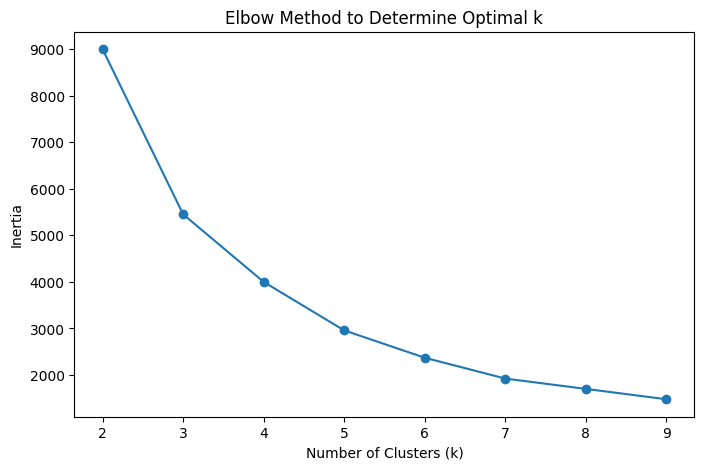

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal K
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o'  )
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


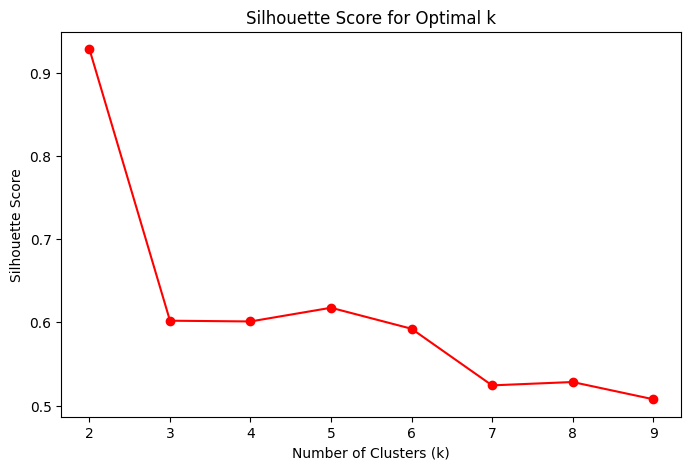

In [ ]:
#  Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


*Here , we get the Optimal k value .i.e, best k value (k=3)*

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(rfm_scaled, labels)
print(f"✅ Silhouette Score: {silhouette_avg:.3f}")


✅ Silhouette Score: 0.508


In [ ]:
optimal_k = 3 # (Change based on elbow/silhouette result)

# Train the model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50, max_iter=500, algorithm="lloyd")
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Assign meaningful labels to clusters
rfm['Segment'] = rfm['Cluster'].map({
    0: 'High-Value Customer',
    1: 'Loyal Customer',
    2: 'Occasional Buyer',
    3: 'Lost Customer'
})

print(rfm[['Cluster' ,'Segment']].tail(20))


            Cluster              Segment
CustomerID                              
18259.0           0  High-Value Customer
18260.0           1       Loyal Customer
18261.0           0  High-Value Customer
18262.0           1       Loyal Customer
18263.0           0  High-Value Customer
18265.0           0  High-Value Customer
18268.0           0  High-Value Customer
18269.0           1       Loyal Customer
18270.0           0  High-Value Customer
18272.0           0  High-Value Customer
18273.0           0  High-Value Customer
18274.0           0  High-Value Customer
18276.0           0  High-Value Customer
18277.0           0  High-Value Customer
18278.0           0  High-Value Customer
18280.0           1       Loyal Customer
18281.0           1       Loyal Customer
18282.0           0  High-Value Customer
18283.0           0  High-Value Customer
18287.0           0  High-Value Customer


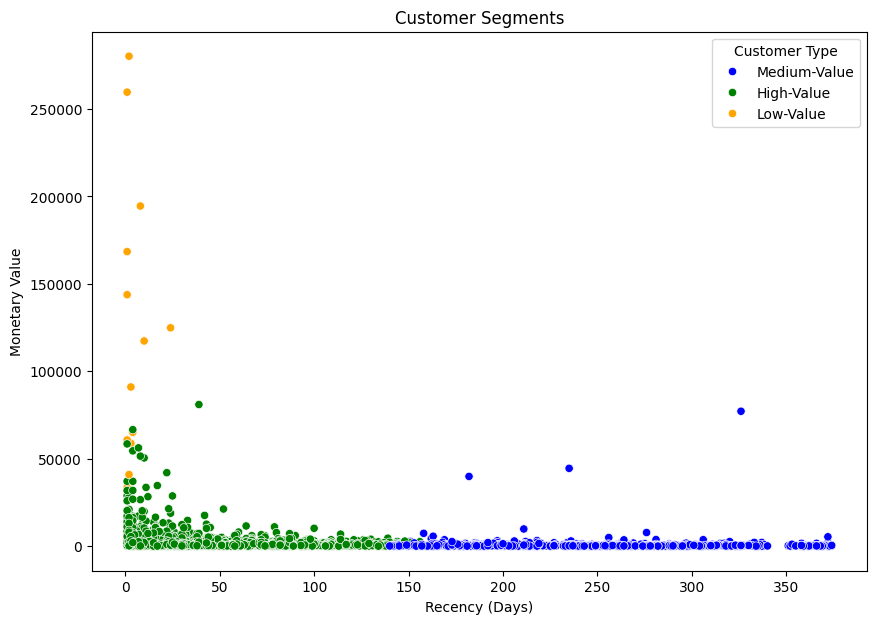

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom labels for clusters
cluster_labels = {0: 'High-Value', 1: 'Medium-Value', 2: 'Low-Value'}

# Map cluster labels to their names
rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_labels)

# Use a more positive color palette
custom_palette = {'High-Value': 'green', 'Medium-Value': 'blue', 'Low-Value': 'orange'}

plt.figure(figsize=(10,7))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster_Label'], palette=custom_palette)

plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.title('Customer Segments')
plt.legend(title='Customer Type')
plt.show()


In [ ]:
rfm

,Recency,Frequency,Monetary,Cluster,Segment,R,F,M,RFM_Score,Loyalty,Cluster_Label
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,Loyal Customer,5,3,1,9,Regular,Medium-Value
12347.0,2,182,4310.00,0,High-Value Customer,2,1,5,8,Regular,High-Value
12348.0,75,31,1797.24,0,High-Value Customer,5,2,5,12,Loyal,High-Value
12349.0,19,73,1757.55,0,High-Value Customer,4,2,2,8,Regular,High-Value
12350.0,310,17,334.40,1,Loyal Customer,4,5,1,10,Regular,Medium-Value
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,Loyal Customer,1,2,5,8,Regular,Medium-Value
18281.0,181,7,80.82,1,Loyal Customer,1,1,1,3,Regular,Medium-Value
18282.0,8,12,178.05,0,High-Value Customer,4,3,3,10,Regular,High-Value


# ***LOYAL CUSTOMERS***

In [ ]:
rfm['R'] = rfm['Recency'].rank(method="max", ascending=False).astype(int) % 5 + 1
rfm['F'] = rfm['Frequency'].rank(method="max").astype(int) % 5 + 1
rfm['M'] = rfm['Monetary'].rank(method="max").astype(int) % 5 + 1

# Combine into a single RFM score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

# Define loyalty segment
rfm['Loyalty'] = rfm['RFM_Score'].apply(lambda x: 'Loyal' if x >= 12 else 'Regular')

print(rfm[['RFM_Score', 'Loyalty']].head(10))


            RFM_Score  Loyalty
CustomerID                    
12346.0             9  Regular
12347.0             8  Regular
12348.0            12    Loyal
12349.0             8  Regular
12350.0            10  Regular
12352.0             9  Regular
12353.0             9  Regular
12354.0             7  Regular
12355.0            10  Regular
12356.0            13    Loyal


# ***DEMAND FORECATING***

In [ ]:
import pandas as pd
# conerting the invoice date to datetime
df['InvoiceDate'] =pd.to_datetime(df['InvoiceDate'])

# Now , Arrange the Sales data by day
daily_sales= df. groupby(df['InvoiceDate'].dt.date).agg({'Quantity': 'sum'}).reset_index()
daily_sales.columns=['Date','Sales']

# convert date to date time format
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

print(daily_sales.head())


        Date  Sales
0 2010-12-01  24215
1 2010-12-02  31142
2 2010-12-03  11839
3 2010-12-05  16450
4 2010-12-06  16291


In [ ]:
daily_sales.head(31)

,Date,Sales
0,2010-12-01,24215
1,2010-12-02,31142
2,2010-12-03,11839
3,2010-12-05,16450
4,2010-12-06,16291
5,2010-12-07,19444
6,2010-12-08,21573
7,2010-12-09,17415
8,2010-12-10,16051
9,2010-12-12,10599


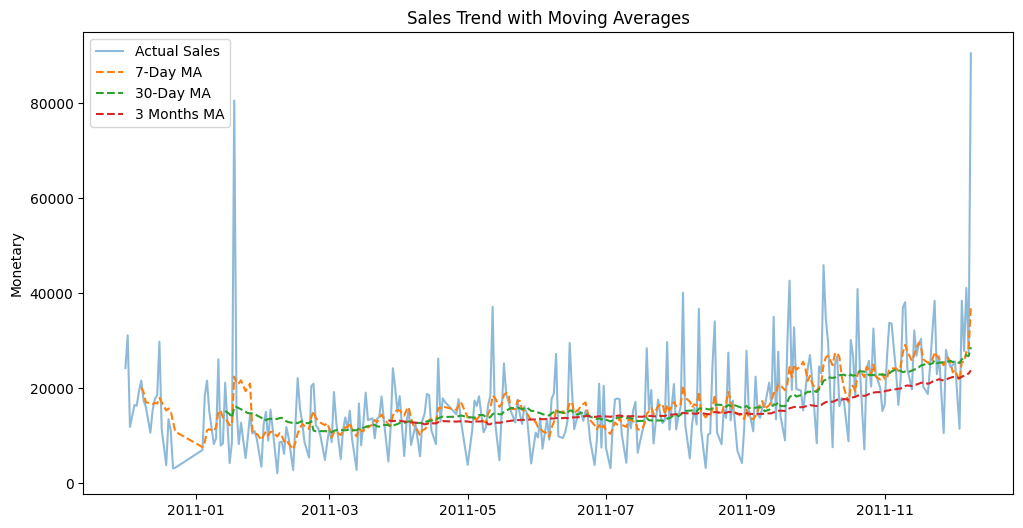

In [ ]:
import matplotlib.pyplot as plt

# Compute 7-day , 30-day  and 3 months  moving averages
daily_sales['MA_7'] = daily_sales['Sales'].rolling(window=7).mean()
daily_sales['MA_30'] = daily_sales['Sales'].rolling(window=30).mean()
daily_sales['MA_91']= daily_sales['Sales'].rolling(window=91).mean()

# Plot sales data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label="Actual Sales", alpha=0.5)
plt.plot(daily_sales['Date'], daily_sales['MA_7'], label="7-Day MA", linestyle="dashed")
plt.plot(daily_sales['Date'], daily_sales['MA_30'], label="30-Day MA", linestyle="dashed")
plt.plot(daily_sales['Date'], daily_sales['MA_91'], label="3 Months MA", linestyle="dashed")

plt.legend()
plt.ylabel("Monetary")

plt.title("Sales Trend with Moving Averages")
plt.show()


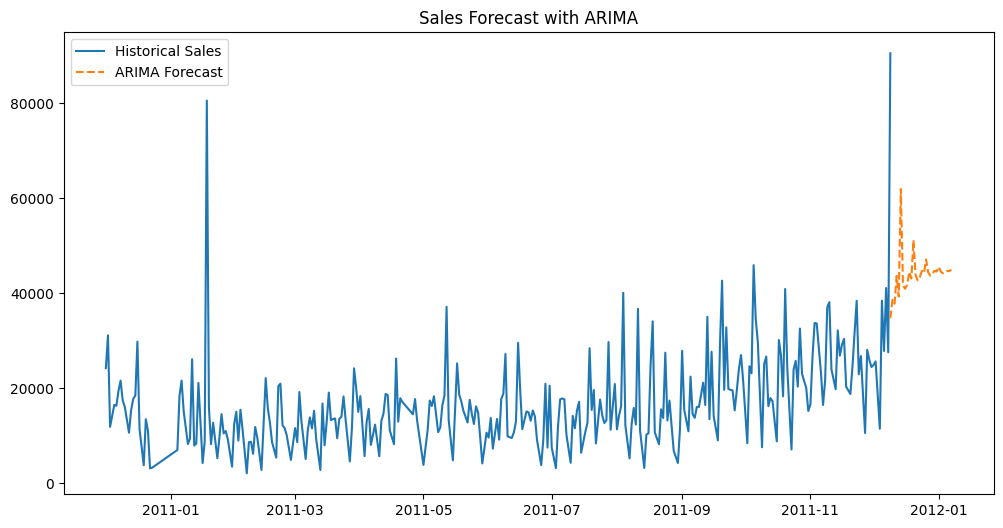

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fit ARIMA Model
model = ARIMA(daily_sales['Sales'], order=(5,1,0))  # (p,d,q) values tuned for this case
model_fit = model.fit()

# Predict next 30 days
future_dates = pd.date_range(start=daily_sales['Date'].max(), periods=30, freq='D')
forecast = model_fit.forecast(steps=30)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label="Historical Sales")
plt.plot(future_dates, forecast, label="ARIMA Forecast", linestyle="dashed")
plt.legend()
plt.title("Sales Forecast with ARIMA")
plt.show()


# ***MODEL EVALUATION***



In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
db_index = davies_bouldin_score(rfm_scaled, rfm['Cluster'])
ch_score = calinski_harabasz_score(rfm_scaled, rfm['Cluster'])

print(f"✅ Silhouette Score: {silhouette_avg:.3f}")
print(f"✅ Davies-Bouldin Index: {db_index:.3f}")
print(f"✅ Calinski-Harabasz Score: {ch_score:.3f}")


✅ Silhouette Score: 0.602
✅ Davies-Bouldin Index: 0.737
✅ Calinski-Harabasz Score: 3007.624


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DaysSinceLastPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371
